# **Spatial interpolation and smoothing**


In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.ndimage import filters


In [8]:
cosmos = pd.read_csv('../datasets/cosmos_rover.csv')
cosmos.head()


,RecordNum,Date Time_UTC,PTB110_mb,T_CS215,RH_CS215,N1Cts,N2Cts,N3Cts,N4Cts,N5Cts,N6Cts,N7Cts,N8Cts,LatDec,LongDec,Alt_meters,Speed_kmh
0,1,2017/08/10 13:15:00,973.29,21.7,85.2,35,40,37,42,39,45,33,37,38.68208,97.37201,389.3,0.00
1,2,2017/08/10 13:16:00,973.31,21.7,86.9,44,44,39,36,37,36,38,38,38.68213,97.37201,389.5,0.00
2,3,2017/08/10 13:17:00,973.25,21.6,86.9,38,37,47,32,42,30,42,41,38.68213,97.37201,389.5,0.00
3,4,2017/08/10 13:18:00,972.55,20.4,89.4,38,46,42,39,34,42,36,36,38.68692,97.37201,391.3,51.28
4,5,2017/08/10 13:19:00,972.68,19.6,94.8,36,39,39,42,30,29,43,36,38.69318,97.37199,391.3,37.98


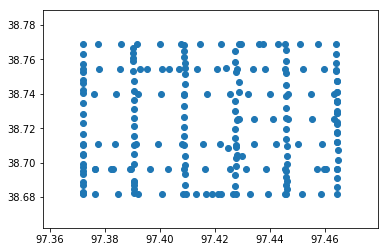

In [175]:
# Display transect
plt.figure(figsize=(6,4))
plt.scatter(cosmos.LongDec, cosmos.LatDec)
plt.show()


In [10]:
# Total distance using trapezoidal integration
total_distance = np.trapz(cosmos.Speed_kmh/60)
print('Total distance:',total_distance,'km')


Total distance: 133.118 km


In [ ]:
# Total distance based on average speed and total driving time
np.mean(cosmos.Speed_kmh) * cosmos.shape[0]/60


In [91]:
# Fast neutron counts
counts_detector1 = cosmos.N1Cts + cosmos.N2Cts + cosmos.N3Cts + cosmos.N4Cts
counts_detector2 = cosmos.N5Cts + cosmos.N6Cts + cosmos.N7Cts + cosmos.N8Cts
total_counts = counts_detector1 + counts_detector2


In [143]:
# Generate grid
lon_min = np.min(cosmos.LongDec)
lon_max = np.max(cosmos.LongDec)
lon_vec = np.linspace(lon_min,lon_max, 500, endpoint=True)

lat_min = np.min(cosmos.LatDec)
lat_max = np.max(cosmos.LatDec)
lat_vec = np.linspace(lat_min,lat_max, 500, endpoint=True)

lon_grid, lat_grid = np.meshgrid(lon_vec, lat_vec)
print(lon_grid.shape)


(500, 500)


In [159]:
# Interpolation
points = (cosmos.LongDec.values,cosmos.LatDec.values)
values = total_counts
grid_counts = griddata(points, values, (lon_grid, lat_grid), method='linear', fill_value=np.mean(total_counts))


In [166]:
# Smooth noisy 2D interpolation
grid_counts_smooth = filters.gaussian_filter(grid_counts,10)
#grid_counts_smooth = filters.median_filter(grid_counts, 25)


(500, 500)

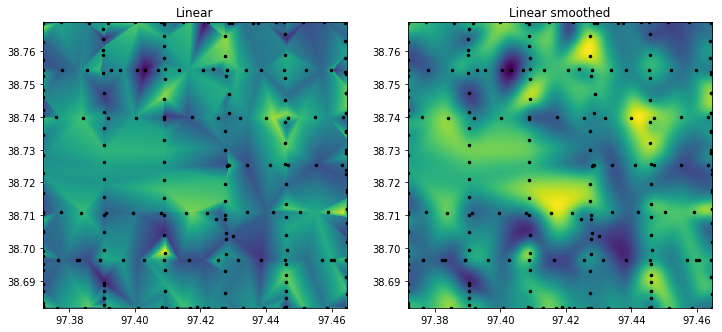

In [178]:
plt.figure(figsize=(12,8))
plt.subplot(121)
plt.imshow(grid_counts, extent=(lon_min,lon_max,lat_min,lat_max))
plt.plot(cosmos.LongDec,cosmos.LatDec, 'k.', ms=5)
plt.title('Linear')

plt.subplot(122)
plt.imshow(grid_counts_smooth, extent=(lon_min,lon_max,lat_min,lat_max))
plt.plot(cosmos.LongDec,cosmos.LatDec, 'k.', ms=5)
plt.title('Linear smoothed')

plt.show()

The smoothing really changes the map helps to filter out much of the noise in the data. For isntance, the yellow blog in the middle of the map (around Lat=38.715 and Lon=-97.42) is a small town in Kansas named Gypsum, which yields more neutron counts due to impervious surfaces that prevent precipitation events from infiltrating into the soil.
